In [1]:
%matplotlib notebook
import matplotlib.animation as ani
import matplotlib.colors as colors
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from planetThermo import pco2
from planetThermo import tco2
import scipy.linalg
from scipy.interpolate import pchip
import statsmodels.api as sm
import pickle
plt.rc('font', family='serif')
plt.rcParams['font.weight']= 'heavy'
plt.rcParams.update({'font.size': 12})

In [2]:
#LOAD IN NORTH RESULTS
#to read the data for plotting:
# Load data (deserialize)
with open('North_Snowfall_Results2.pickle', 'rb') as handle:
    North_results = pickle.load(handle)

In [3]:
#LOAD IN SOUTH RESULTS
#to read the data for plotting:
# Load data (deserialize)
with open('South_Snowfall_Results2.pickle', 'rb') as handle:
    South_results = pickle.load(handle)

In [4]:
#read results in for North

N_Water_deposit29_B  =  North_results['Water_deposit29_B'] 
N_CO2_deposit29_B    =  North_results['CO2_deposit29_B']   
N_Mass_deposit29_B   =  North_results['Mass_deposit29_B']  
N_CMass_deposit29_B  =  North_results['CMass_deposit29_B'] 
N_Water_cum29      =  North_results['Water_cum29']       
N_Mass_cum29       =  North_results['Mass_cum29']        
N_DryIce_cum29     =  North_results['DryIce_cum29']      
N_CMass_cum29      =  North_results['CMass_cum29']       

#MY30
N_Water_deposit30_B =  North_results['Water_deposit30_B'] 
N_CO2_deposit30_B   =  North_results['CO2_deposit30_B']   
N_Mass_deposit30_B  =  North_results['Mass_deposit30_B']  
N_CMass_deposit30_B =  North_results['CMass_deposit30_B'] 
N_Water_cum30     =  North_results['Water_cum30']       
N_Mass_cum30      =  North_results['Mass_cum30']        
N_DryIce_cum30    =  North_results['DryIce_cum30']      
N_CMass_cum30     =  North_results['CMass_cum30']       

#MY31
N_Water_deposit31_B =  North_results['Water_deposit31_B'] 
N_CO2_deposit31_B   =  North_results['CO2_deposit31_B']   
N_Mass_deposit31_B  =  North_results['Mass_deposit31_B']  
N_CMass_deposit31_B =  North_results['CMass_deposit31_B'] 
N_Water_cum31     =  North_results['Water_cum31']       
N_Mass_cum31      =  North_results['Mass_cum31']        
N_DryIce_cum31    =  North_results['DryIce_cum31']      
N_CMass_cum31     =  North_results['CMass_cum31']       

#MY32
N_Water_deposit32_B =  North_results['Water_deposit32_B'] 
N_CO2_deposit32_B   =  North_results['CO2_deposit32_B']   
N_Mass_deposit32_B  =  North_results['Mass_deposit32_B']  
N_CMass_deposit32_B =  North_results['CMass_deposit32_B'] 
N_Water_cum32     =  North_results['Water_cum32']       
N_Mass_cum32      =  North_results['Mass_cum32']        
N_DryIce_cum32    =  North_results['DryIce_cum32']      
N_CMass_cum32     =  North_results['CMass_cum32']       

#MY33
N_Water_deposit33_B =  North_results['Water_deposit33_B'] 
N_CO2_deposit33_B   =  North_results['CO2_deposit33_B']   
N_Mass_deposit33_B  =  North_results['Mass_deposit33_B']  
N_CMass_deposit33_B =  North_results['CMass_deposit33_B'] 
N_Water_cum33     =  North_results['Water_cum33']       
N_Mass_cum33      =  North_results['Mass_cum33']        
N_DryIce_cum33    =  North_results['DryIce_cum33']      
N_CMass_cum33     =  North_results['CMass_cum33']       

#MY34
N_Water_deposit34_B =  North_results['Water_deposit34_B'] 
N_CO2_deposit34_B   =  North_results['CO2_deposit34_B']   
N_Mass_deposit34_B  =  North_results['Mass_deposit34_B']  
N_CMass_deposit34_B =  North_results['CMass_deposit34_B'] 
N_Water_cum34     =  North_results['Water_cum34']       
N_Mass_cum34      =  North_results['Mass_cum34']        
N_DryIce_cum34    =  North_results['DryIce_cum34']      
N_CMass_cum34  =  North_results['CMass_cum34']       


#MY35
N_Water_deposit35_B =  North_results['Water_deposit35_B'] 
N_CO2_deposit35_B   =  North_results['CO2_deposit35_B']   
N_Mass_deposit35_B  =  North_results['Mass_deposit35_B']  
N_CMass_deposit35_B =  North_results['CMass_deposit35_B'] 
N_Water_cum35     =  North_results['Water_cum35']       
N_Mass_cum35      =  North_results['Mass_cum35']        
N_DryIce_cum35    =  North_results['DryIce_cum35']      
N_CMass_cum35  =  North_results['CMass_cum35']  

In [5]:
#read results in for South

#MY 29
S_Water_deposit29_B  =   South_results['Water_deposit29_B'] 
S_CO2_deposit29_B    =   South_results['CO2_deposit29_B']   
S_Mass_deposit29_B   =   South_results['Mass_deposit29_B']  
S_CMass_deposit29_B  =   South_results['CMass_deposit29_B'] 
S_Water_cum29      =   South_results['Water_cum29']       
S_Mass_cum29       =   South_results['Mass_cum29']        
S_DryIce_cum29     =   South_results['DryIce_cum29']      
S_CMass_cum29      =   South_results['CMass_cum29']       

#MY 30
S_Water_deposit30_B =   South_results['Water_deposit30_B'] 
S_CO2_deposit30_B   =   South_results['CO2_deposit30_B']   
S_Mass_deposit30_B  =   South_results['Mass_deposit30_B']  
S_CMass_deposit30_B =   South_results['CMass_deposit30_B'] 
S_Water_cum30     =   South_results['Water_cum30']       
S_Mass_cum30      =   South_results['Mass_cum30']        
S_DryIce_cum30    =   South_results['DryIce_cum30']      
S_CMass_cum30     =   South_results['CMass_cum30']       

#MY 31
S_Water_deposit31_B =   South_results['Water_deposit31_B'] 
S_CO2_deposit31_B   =   South_results['CO2_deposit31_B']   
S_Mass_deposit31_B  =   South_results['Mass_deposit31_B']  
S_CMass_deposit31_B =   South_results['CMass_deposit31_B'] 
S_Water_cum31     =   South_results['Water_cum31']       
S_Mass_cum31      =   South_results['Mass_cum31']        
S_DryIce_cum31    =   South_results['DryIce_cum31']      
S_CMass_cum31     =   South_results['CMass_cum31']       

#MY 32
S_Water_deposit32_B =   South_results['Water_deposit32_B'] 
S_CO2_deposit32_B   =   South_results['CO2_deposit32_B']   
S_Mass_deposit32_B  =   South_results['Mass_deposit32_B']  
S_CMass_deposit32_B =   South_results['CMass_deposit32_B'] 
S_Water_cum32     =   South_results['Water_cum32']       
S_Mass_cum32      =   South_results['Mass_cum32']        
S_DryIce_cum32    =   South_results['DryIce_cum32']      
S_CMass_cum32     =   South_results['CMass_cum32']       

#MY 33
S_Water_deposit33_B =   South_results['Water_deposit33_B'] 
S_CO2_deposit33_B   =   South_results['CO2_deposit33_B']   
S_Mass_deposit33_B  =   South_results['Mass_deposit33_B']  
S_CMass_deposit33_B =   South_results['CMass_deposit33_B'] 
S_Water_cum33     =   South_results['Water_cum33']       
S_Mass_cum33      =   South_results['Mass_cum33']        
S_DryIce_cum33    =   South_results['DryIce_cum33']      
S_CMass_cum33     =   South_results['CMass_cum33']       

#MY 34
S_Water_deposit34_B =   South_results['Water_deposit34_B'] 
S_CO2_deposit34_B   =   South_results['CO2_deposit34_B']   
S_Mass_deposit34_B  =   South_results['Mass_deposit34_B']  
S_CMass_deposit34_B =   South_results['CMass_deposit34_B'] 
S_Water_cum34     =   South_results['Water_cum34']       
S_Mass_cum34      =   South_results['Mass_cum34']        
S_DryIce_cum34    =   South_results['DryIce_cum34']      
S_CMass_cum34     =   South_results['CMass_cum34']       

#MY 35
S_Water_deposit35_B =   South_results['Water_deposit35_B'] 
S_CO2_deposit35_B   =   South_results['CO2_deposit35_B']   
S_Mass_deposit35_B  =   South_results['Mass_deposit35_B']  
S_CMass_deposit35_B =   South_results['CMass_deposit35_B'] 
S_Water_cum35     =   South_results['Water_cum35']       
S_Mass_cum35      =   South_results['Mass_cum35']        
S_DryIce_cum35    =   South_results['DryIce_cum35']      
S_CMass_cum35     =   South_results['CMass_cum35'] 

In [12]:
#PRINT RESULTS OF TOTAL AMOUNTS FOR THE NORTH
print('''the mass of water deposited in MY 29 is {:3g} kg and 
the mass of CO2 deposited is: {:3g} kg'''.format(np.nansum(N_Mass_cum29[-1,:]),np.nansum(N_CMass_cum29[-1,:])))
print('''the mass of water deposited in MY 30 is {:3g} kg and 
the mass of CO2 deposited is: {:3g} kg'''.format(np.nansum(N_Mass_cum30[-1,:]),np.nansum(N_CMass_cum30[-1,:])))
print('''the mass of water deposited in MY 31 is {:3g} kg and 
the mass of CO2 deposited is: {:3g} kg'''.format(np.nansum(N_Mass_cum31[-1,:]),np.nansum(N_CMass_cum31[-1,:])))
print('''the mass of water deposited in MY 32 is {:3g} kg and 
the mass of CO2 deposited is: {:3g} kg'''.format(np.nansum(N_Mass_cum32[-1,:]),np.nansum(N_CMass_cum32[-1,:])))
print('''the mass of water deposited in MY 33 is {:3g} kg and 
the mass of CO2 deposited is: {:3g} kg'''.format(np.nansum(N_Mass_cum33[-1,:]),np.nansum(N_CMass_cum33[-1,:])))
print('''the mass of water deposited in MY 34 is {:3g} kg and 
the mass of CO2 deposited is: {:3g} kg'''.format(np.nansum(N_Mass_cum34[-1,:]),np.nansum(N_CMass_cum34[-1,:])))
print('''the mass of water deposited in MY 35 is {:3g} kg and 
the mass of CO2 deposited is: {:3g} kg'''.format(np.nansum(N_Mass_cum35[-1,:]),np.nansum(N_CMass_cum35[-1,:])))

the mass of water deposited in MY 29 is 1.33938e+11 kg and 
the mass of CO2 deposited is: 1.0918e+15 kg
the mass of water deposited in MY 30 is 1.21132e+11 kg and 
the mass of CO2 deposited is: 1.04223e+15 kg
the mass of water deposited in MY 31 is 1.24672e+11 kg and 
the mass of CO2 deposited is: 1.09097e+15 kg
the mass of water deposited in MY 32 is 1.09627e+11 kg and 
the mass of CO2 deposited is: 9.14716e+14 kg
the mass of water deposited in MY 33 is 9.95054e+10 kg and 
the mass of CO2 deposited is: 9.14954e+14 kg
the mass of water deposited in MY 34 is 1.13621e+11 kg and 
the mass of CO2 deposited is: 8.96222e+14 kg
the mass of water deposited in MY 35 is 1.22309e+11 kg and 
the mass of CO2 deposited is: 1.11118e+15 kg


In [14]:
#PRINT RESULTS OF TOTAL AMOUNTS FOR THE SOUTH
print('''the mass of water deposited in MY 29 is {:3g} kg and 
the mass of CO2 deposited is: {:3g} kg'''.format(np.nansum(S_Mass_cum29[-1,:]),np.nansum(S_CMass_cum29[-1,:])))
print('''the mass of water deposited in MY 30 is {:3g} kg and 
the mass of CO2 deposited is: {:3g} kg'''.format(np.nansum(S_Mass_cum30[-1,:]),np.nansum(S_CMass_cum30[-1,:])))
print('''the mass of water deposited in MY 31 is {:3g} kg and 
the mass of CO2 deposited is: {:3g} kg'''.format(np.nansum(S_Mass_cum31[-1,:]),np.nansum(S_CMass_cum31[-1,:])))
print('''the mass of water deposited in MY 32 is {:3g} kg and 
the mass of CO2 deposited is: {:3g} kg'''.format(np.nansum(S_Mass_cum32[-1,:]),np.nansum(S_CMass_cum32[-1,:])))
print('''the mass of water deposited in MY 33 is {:3g} kg and 
the mass of CO2 deposited is: {:3g} kg'''.format(np.nansum(S_Mass_cum33[-1,:]),np.nansum(S_CMass_cum33[-1,:])))
print('''the mass of water deposited in MY 34 is {:3g} kg and 
the mass of CO2 deposited is: {:3g} kg'''.format(np.nansum(S_Mass_cum34[-1,:]),np.nansum(S_CMass_cum34[-1,:])))
print('''the mass of water deposited in MY 35 is {:3g} kg and 
the mass of CO2 deposited is: {:3g} kg'''.format(np.nansum(S_Mass_cum35[-1,:]),np.nansum(S_CMass_cum35[-1,:])))

the mass of water deposited in MY 29 is 1.57973e+10 kg and 
the mass of CO2 deposited is: 1.50217e+14 kg
the mass of water deposited in MY 30 is 1.26558e+10 kg and 
the mass of CO2 deposited is: 1.16199e+14 kg
the mass of water deposited in MY 31 is 1.15535e+10 kg and 
the mass of CO2 deposited is: 1.08749e+14 kg
the mass of water deposited in MY 32 is 8.81445e+09 kg and 
the mass of CO2 deposited is: 8.48238e+13 kg
the mass of water deposited in MY 33 is 1.134e+10 kg and 
the mass of CO2 deposited is: 1.05744e+14 kg
the mass of water deposited in MY 34 is 9.54807e+09 kg and 
the mass of CO2 deposited is: 9.1885e+13 kg
the mass of water deposited in MY 35 is 1.34488e+10 kg and 
the mass of CO2 deposited is: 1.23621e+14 kg


In [6]:
#create the latitude arrays associated with the results in the previous two cells for the norht and south pole>
S_LatV = np.array([-87., -86., -85., -84., -83., -82., -81., -80., -79., -78., -77., -76., -75., -74., -73., -72., -71., -70., -69., -68., -67., -66., -65.])
N_LatV = np.array([65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82., 83., 84., 85., 86., 87.])

In [7]:
#Create a smooth plot of the accumulated water thickness over latitude for each year for the north and south.
#south
S29 = sm.nonparametric.lowess(S_Water_cum29[-1,:]*1e6, S_LatV[:-1],frac=0.3) #the limits on the array get rid of the values above 85 N where it is 0
S30 = sm.nonparametric.lowess(S_Water_cum30[-1,:]*1e6, S_LatV[:-1],frac=0.3)
S31 = sm.nonparametric.lowess(S_Water_cum31[-1,:]*1e6, S_LatV[:-1],frac=0.3)
S32 = sm.nonparametric.lowess(S_Water_cum32[-1,:]*1e6, S_LatV[:-1],frac=0.3) 
S33 = sm.nonparametric.lowess(S_Water_cum33[-1,:]*1e6, S_LatV[:-1],frac=0.3)
S34 = sm.nonparametric.lowess(S_Water_cum34[-1,:]*1e6, S_LatV[:-1],frac=0.3)
S35 = sm.nonparametric.lowess(S_Water_cum35[-1,:]*1e6, S_LatV[:-1],frac=0.3)
#north
N29 = sm.nonparametric.lowess(N_Water_cum29[-1,:]*1e6, N_LatV[:-1],frac=0.3) #the limits on the array get rid of the values above 85 N where it is 0
N30 = sm.nonparametric.lowess(N_Water_cum30[-1,:]*1e6, N_LatV[:-1],frac=0.3)
N31 = sm.nonparametric.lowess(N_Water_cum31[-1,:]*1e6, N_LatV[:-1],frac=0.3)
N32 = sm.nonparametric.lowess(N_Water_cum32[-1,:]*1e6, N_LatV[:-1],frac=0.3) 
N33 = sm.nonparametric.lowess(N_Water_cum33[-1,:]*1e6, N_LatV[:-1],frac=0.3)
N34 = sm.nonparametric.lowess(N_Water_cum34[-1,:]*1e6, N_LatV[:-1],frac=0.3)
N35 = sm.nonparametric.lowess(N_Water_cum35[-1,:]*1e6, N_LatV[:-1],frac=0.3)
#for plotting purposes, create a linearly scale colorbar
colors = plt.cm.winter(np.linspace(0,1,16))


<IPython.core.display.Javascript object>


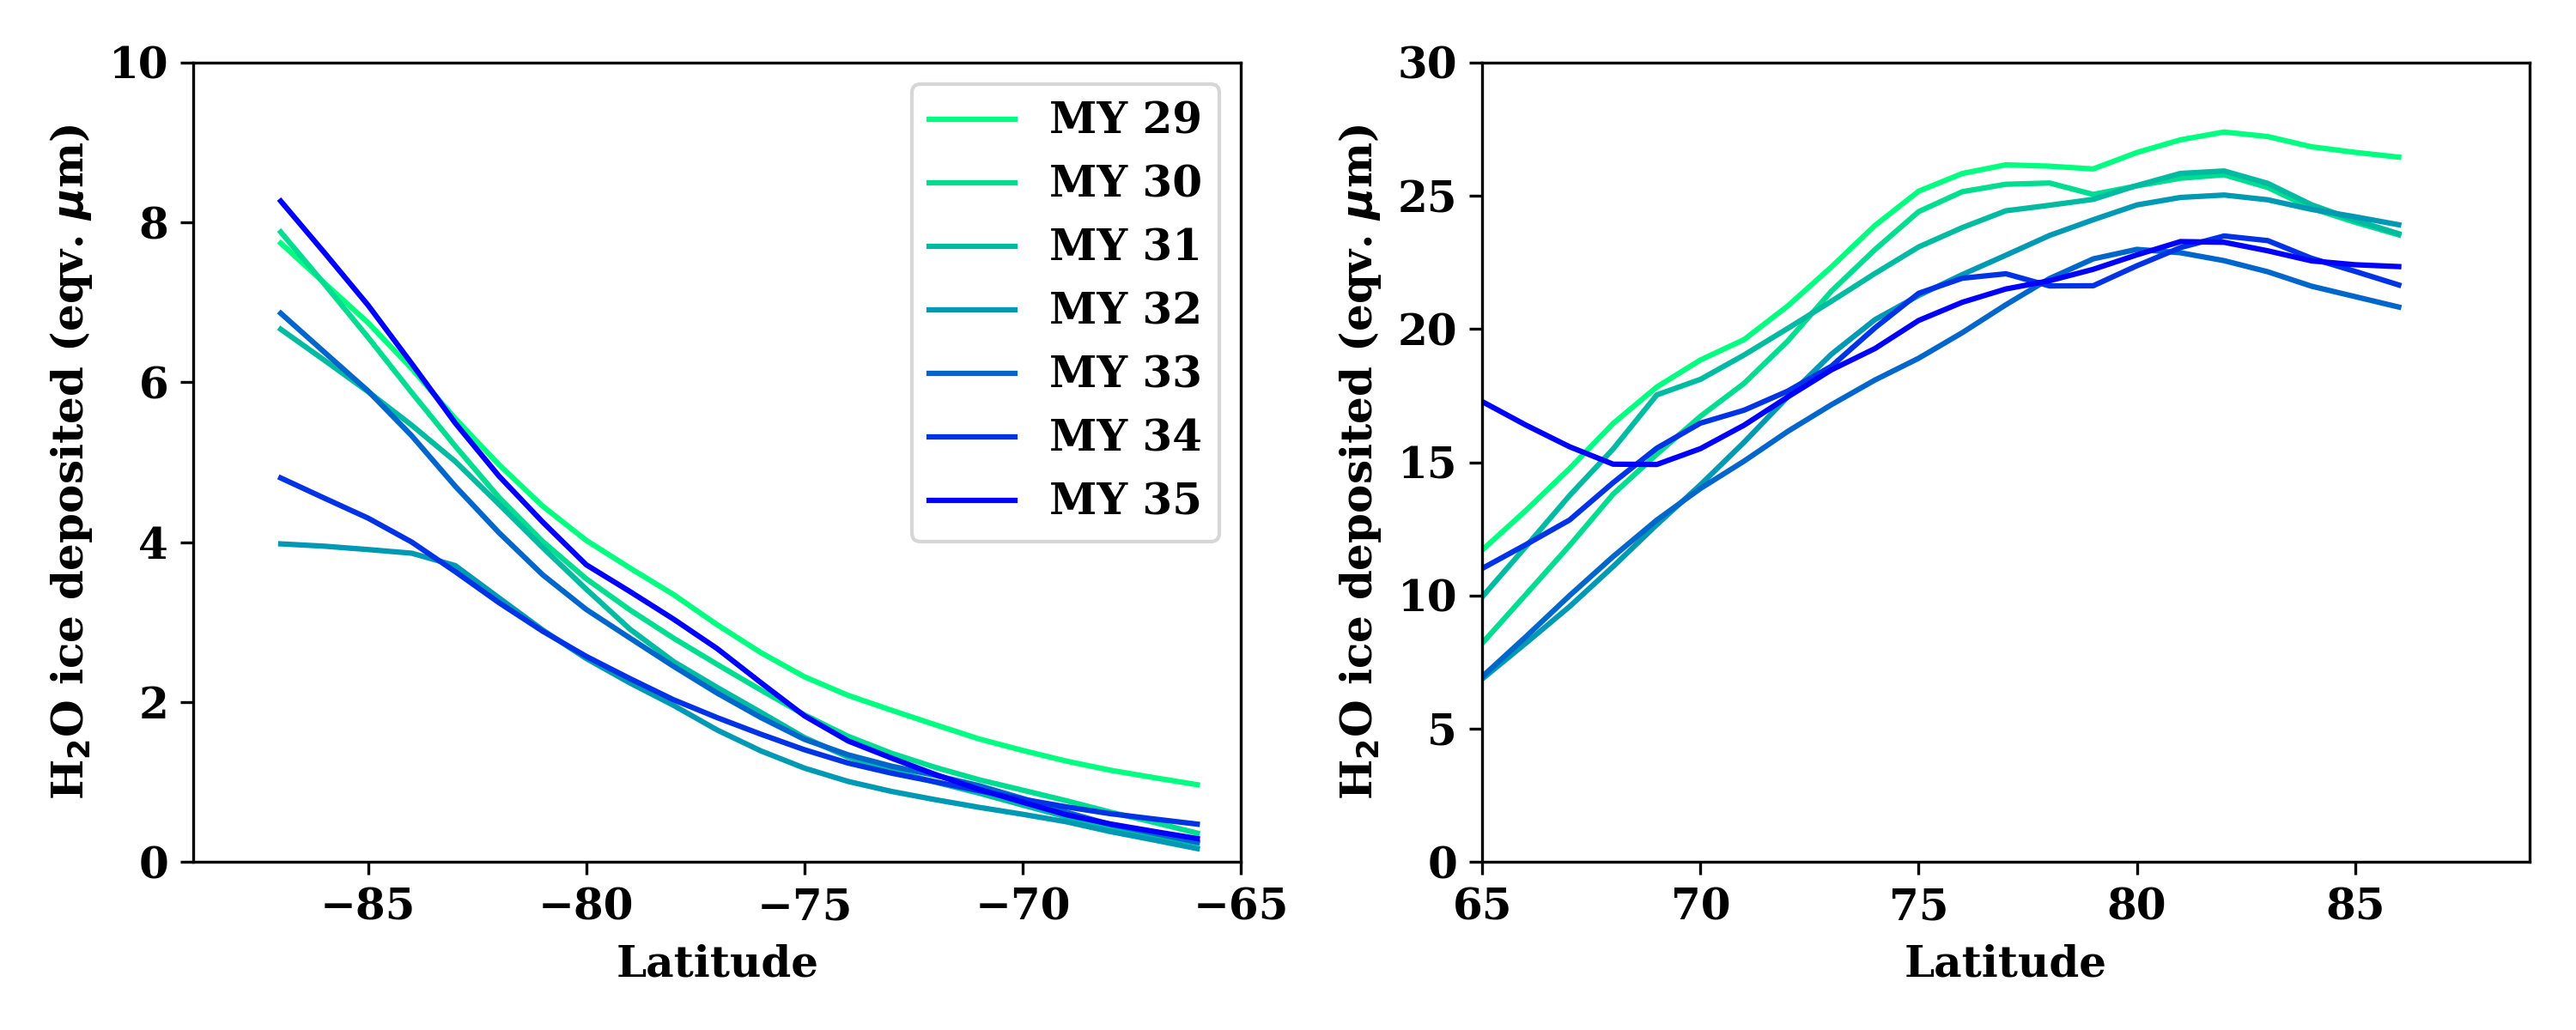

In [8]:
#CREATE PLOT SHOWING THE TREND IN TOTAL SNOWFALL VS Latitude for BOTH NORTH AND SOUTH

figure, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,4), dpi=150)

#Plot south
ax1.plot(S29[:, 0], S29[:, 1],color = colors[15], label='MY 29')
ax1.plot(S30[:, 0], S30[:, 1],color = colors[13], label='MY 30')
ax1.plot(S31[:, 0], S31[:, 1],color = colors[11], label='MY 31')
ax1.plot(S32[:, 0], S32[:, 1],color = colors[9], label='MY 32')
ax1.plot(S33[:, 0], S33[:, 1],color = colors[6], label='MY 33')
ax1.plot(S34[:, 0], S34[:, 1],color = colors[3], label='MY 34')
ax1.plot(S35[:, 0], S35[:, 1],color = colors[0], label='MY 35')


ax1.set_xlabel( 'Latitude',fontweight='bold')
ax1.set_ylabel('H$_2$O ice deposited (eqv. $\mu$m)',fontweight='bold')
ax1.legend()
ax1.set_ylim(0, 10)
ax1.set_xlim(-89,-65)

ax2.plot(N29[:, 0], N29[:, 1],color = colors[15], label='MY 29')
ax2.plot(N30[:, 0], N30[:, 1],color = colors[13], label='MY 30')
ax2.plot(N31[:, 0], N31[:, 1],color = colors[11], label='MY 31')
ax2.plot(N32[:, 0], N32[:, 1],color = colors[9], label='MY 32')
ax2.plot(N33[:, 0], N33[:, 1],color = colors[6], label='MY 33')
ax2.plot(N34[:, 0], N34[:, 1],color = colors[3], label='MY 34')
ax2.plot(N35[:, 0], N35[:, 1],color = colors[0], label='MY 35')


ax2.set_xlabel( 'Latitude',fontweight='bold')
ax2.set_ylabel('H$_2$O ice deposited (eqv. $\mu$m)',fontweight='bold')
ax2.set_ylim(0, 30)
ax2.set_xlim(65,89)
plt.tight_layout()
plt.savefig('insertnamehere.png')

In [10]:
#Calculate the total amount of mass accumulated at the end of each winter for every MY
#in the north
N_cum = np.zeros(7)
N_cum[0] = np.nansum(N_Mass_cum29[-1,:])
N_cum[1] = np.nansum(N_Mass_cum30[-1,:])
N_cum[2] = np.nansum(N_Mass_cum31[-1,:])
N_cum[3] = np.nansum(N_Mass_cum32[-1,:])
N_cum[4] = np.nansum(N_Mass_cum33[-1,:])
N_cum[5] = np.nansum(N_Mass_cum34[-1,:])
N_cum[6] = np.nansum(N_Mass_cum35[-1,:])
#in the south
S_cum = np.zeros(7)
S_cum[0] = np.nansum(S_Mass_cum29[-1,:])
S_cum[1] = np.nansum(S_Mass_cum30[-1,:])
S_cum[2] = np.nansum(S_Mass_cum31[-1,:])
S_cum[3] = np.nansum(S_Mass_cum32[-1,:])
S_cum[4] = np.nansum(S_Mass_cum33[-1,:])
S_cum[5] = np.nansum(S_Mass_cum34[-1,:])
S_cum[6] = np.nansum(S_Mass_cum35[-1,:])

<IPython.core.display.Javascript object>


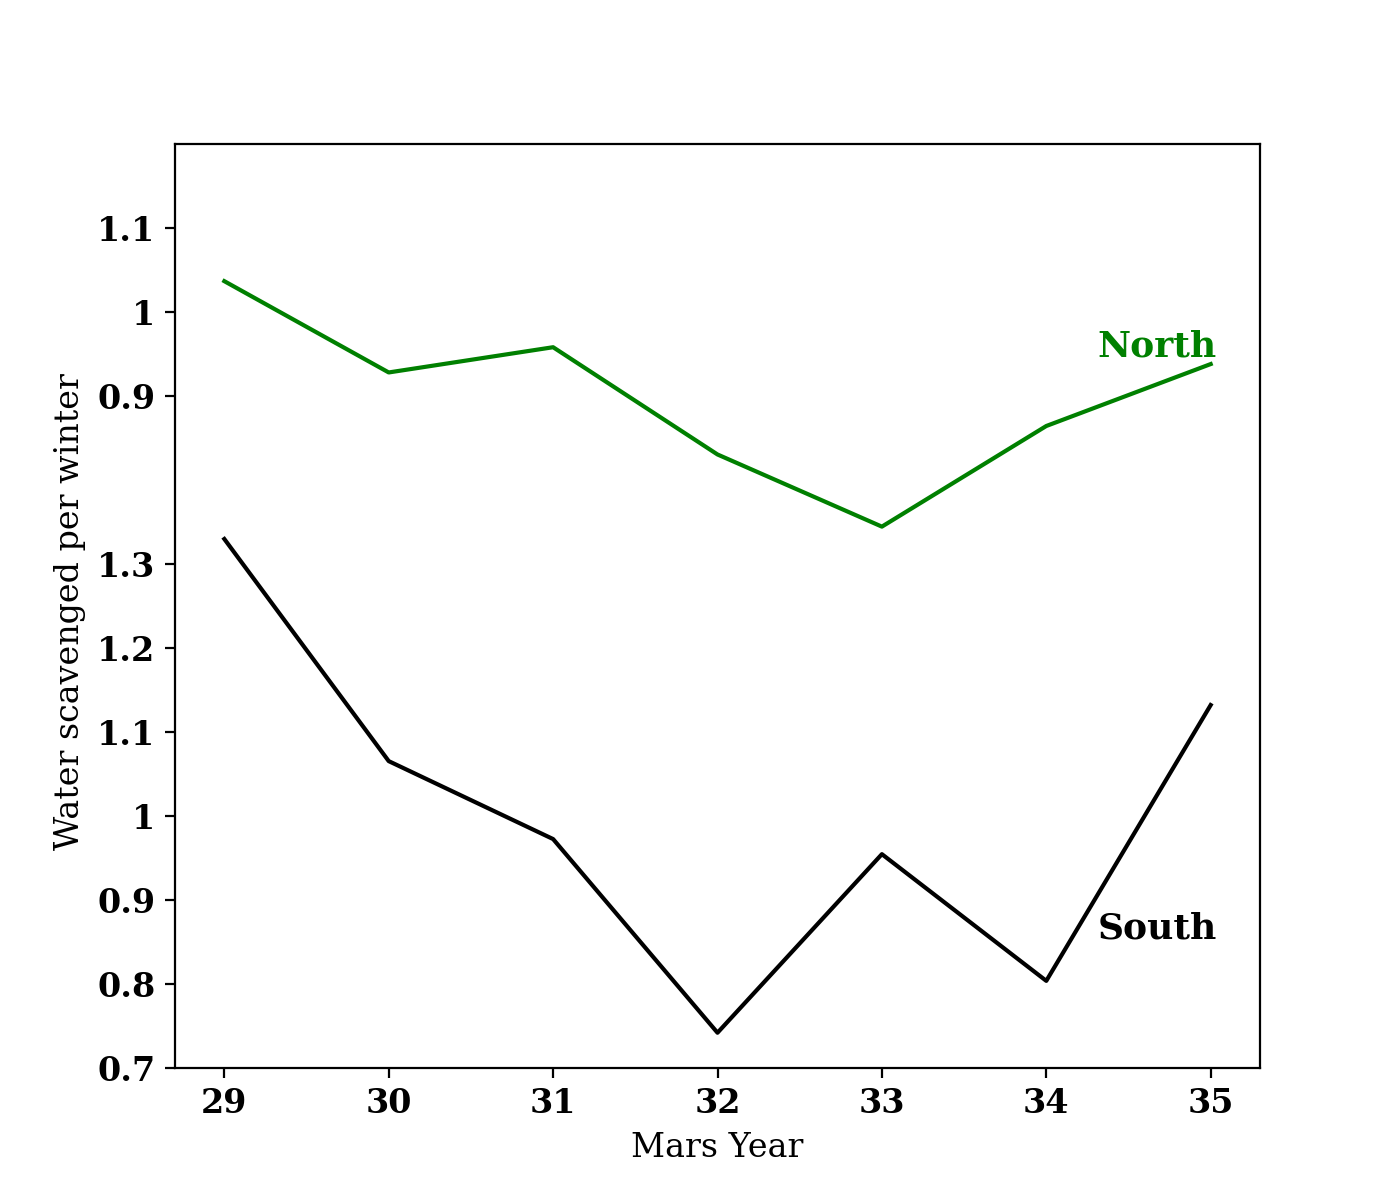

Text(0.85, 0.14, 'South')

In [11]:
#CREATE PLOT SHOWING THE TREND IN TOTAL SNOWFALL VS MY for BOTH NORTH AND SOUTH
figure = plt.figure(figsize=(7,6))

ax = plt.axes()
#plot north results
plt.plot([29,30,31,32,33,34,35],(N_cum/np.mean(N_cum))+0.5,'green')
#plot south results
plt.plot([29,30,31,32,33,34,35],(S_cum/np.mean(S_cum)),'black')
plt.ylim(0.7, 1.8)
ax.set_yticks([0.7,0.8,0.9,1,1.1,1.2,1.3,1.5,1.6,1.7])
ax.set_yticklabels([0.7,0.8,0.9,1,1.1,1.2,1.3,0.9,1,1.1])
plt.ylabel('Water scavenged per winter ')
plt.xlabel('Mars Year')
ax.text(0.85, 0.77, 'North',rotation = 0, transform=ax.transAxes, fontsize='13',color='green')
ax.text(0.85, 0.14, 'South',rotation = 0, transform=ax.transAxes, fontsize='13',color='black')
#plt.savefig('Norm_Total_Water_Scavenged_North_South.jpg',dpi = 150)